# Student Performance Indicator
## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model
## 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv("data\stud.csv")

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.shape

(1000, 8)

In [13]:
for col in df.columns[df.dtypes == "object"]:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,- associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [21]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

### 3.2 Check Duplicates

In [22]:
df.duplicated().sum()

np.int64(0)

**There are no duplicates values in the data set**

### 3.3 Check data types

In [23]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### 3.4 Checking the number of unique values of each column

In [24]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [25]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [26]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [27]:
print(f"gender: {df.gender.unique()}")
print(f"race_ethnicity: {df.race_ethnicity.unique()}")
print(f"parental_level_of_education: {df.parental_level_of_education.unique()}")
print(f"lunch: {df.lunch.unique()}")
print(f"test_preparation_course: {df.test_preparation_course.unique()}")

gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


In [28]:
# define numerical & categorical columns
categorical_features = df.columns[df.dtypes == "object"]
numerical_features = df.columns[df.dtypes != "object"]

print(f"we have {len(categorical_features)} categorical features: {categorical_features.to_list()}")
print(f"we have {len(numerical_features)} numerical features: {numerical_features.to_list()}")

we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']


### 3.8 Adding columns for "Total Score" and "Average"

In [32]:
df["total_score"] = df.math_score + df.reading_score + df.writing_score
df["average"] = df.total_score / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
math_full = df[df.math_score == 100].average.count()
reading_full = df[df.reading_score == 100].average.count()
writing_full = df[df.writing_score == 100].average.count()

print(f"number of full scoring students in Math: {math_full}")
print(f"number of full scoring students in Reading: {reading_full}")
print(f"number of full scoring students in Writing: {writing_full}")

number of full scoring students in Math: 7
number of full scoring students in Reading: 17
number of full scoring students in Writing: 14


In [54]:
math_less_20 = df[df.math_score <= 20].average.count()
reading_less_20 = df[df.reading_score <= 20].average.count()
writing_less_20 = df[df.writing_score <= 20].average.count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


**Insights**
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

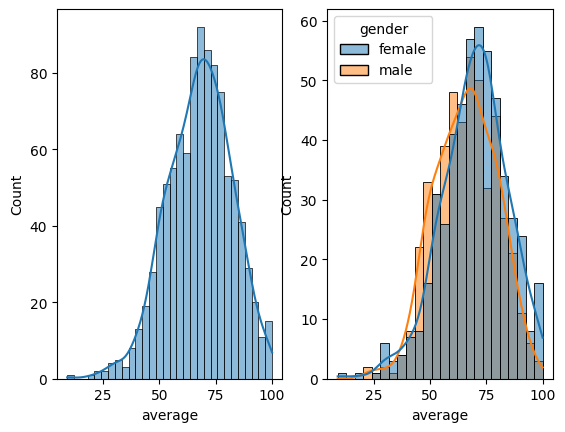

In [62]:
plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
sb.histplot(data=df, x="average", kde=True, bins=30)
plt.subplot(1, 2, 2)
sb.histplot(data=df, x="average", hue="gender", kde=True)


**Insights**
- Female students tend to perform well then male students.

<Axes: xlabel='average', ylabel='Count'>

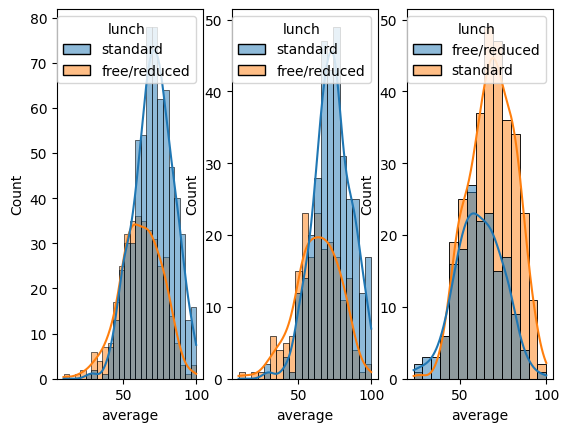

In [65]:
plt.subplots(nrows=1, ncols=3)
plt.subplot(1, 3, 1)
sb.histplot(data=df, x="average", kde=True, hue="lunch")
plt.subplot(1, 3, 2)
sb.histplot(data=df[df.gender == "female"], x="average", hue="lunch", kde=True)
plt.subplot(1, 3, 3)
sb.histplot(data=df[df.gender == "male"], x="average", hue="lunch", kde=True)



**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

<Axes: xlabel='average', ylabel='Count'>

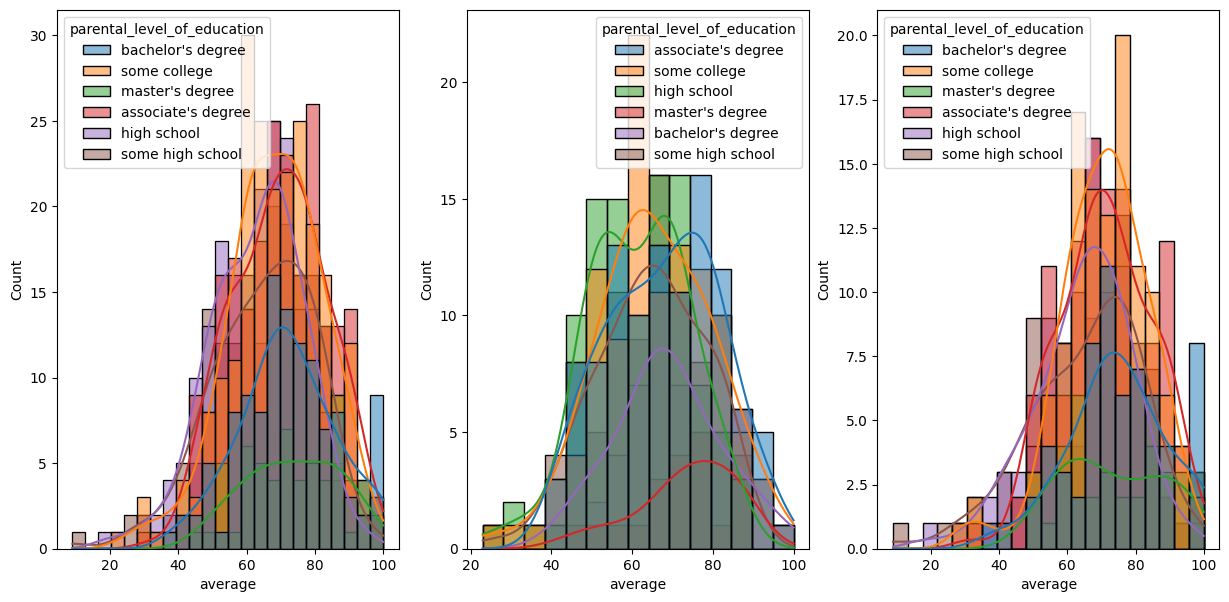

In [70]:
plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
plt.subplot(1, 3, 1)
sb.histplot(data=df, x="average", kde=True, hue="parental_level_of_education")
plt.subplot(1, 3, 2)
sb.histplot(data=df[df.gender == "male"], x="average", hue="parental_level_of_education", kde=True)
plt.subplot(1, 3, 3)
sb.histplot(data=df[df.gender == "female"], x="average", hue="parental_level_of_education", kde=True)


**Insights**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

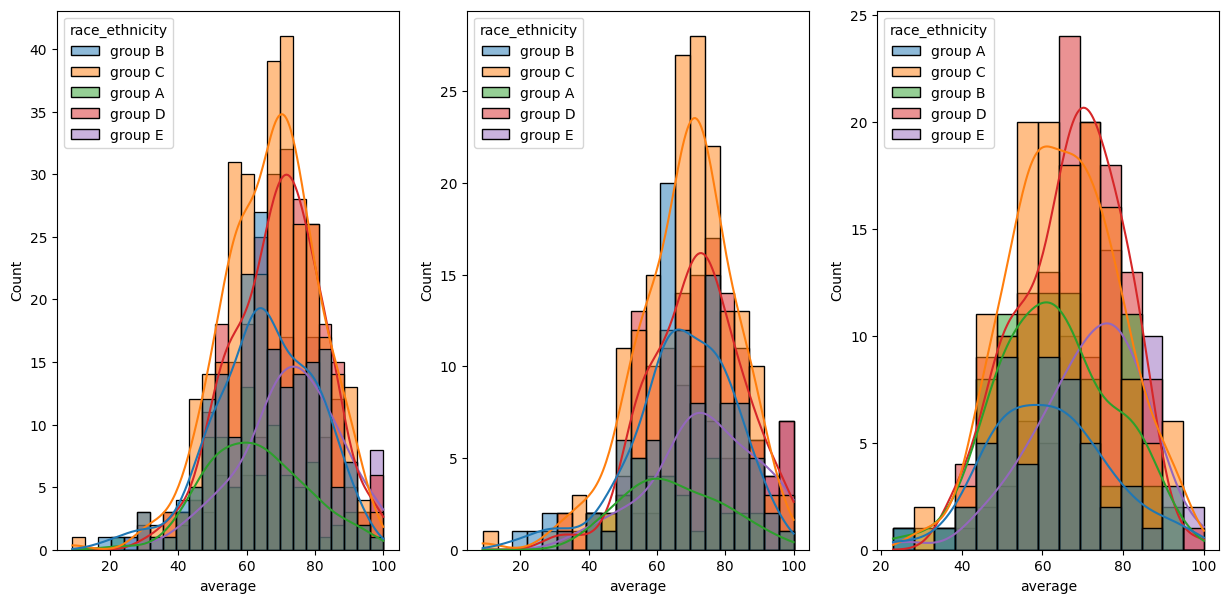

In [72]:
plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
plt.subplot(1, 3, 1)
sb.histplot(data=df, x="average", hue="race_ethnicity", kde=True)
plt.subplot(1, 3, 2)
sb.histplot(data=df[df.gender == "female"], x="average", hue="race_ethnicity", kde=True)
plt.subplot(1, 3, 3)
sb.histplot(data=df[df.gender == "male"], x="average", hue="race_ethnicity", kde=True)

**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in - exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

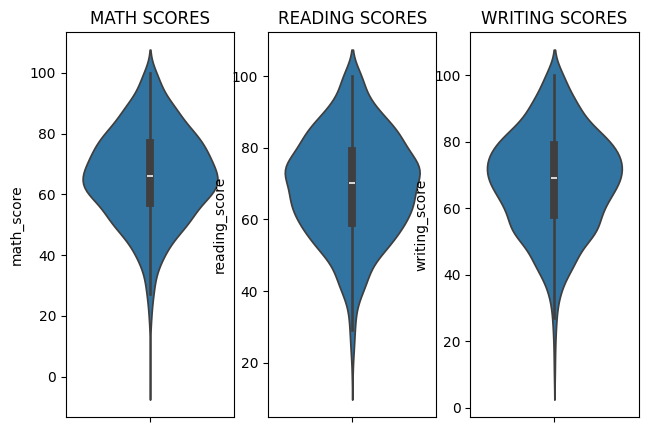

In [77]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sb.violinplot(y='math_score', data=df)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sb.violinplot(y='reading_score', data=df)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sb.violinplot(y='writing_score', data=df)
plt.show()

**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

In [101]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

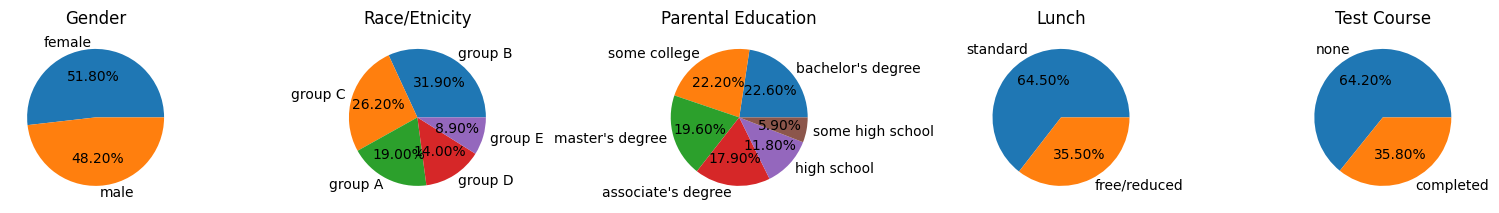

In [106]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
size = df.gender.value_counts()
labels = df.gender.unique()
plt.title("Gender")
plt.pie(size, labels=labels, autopct = "%.2f%%");

plt.subplot(1, 5, 2)
size = df.race_ethnicity.value_counts()
labels = df.race_ethnicity.unique()
plt.title("Race/Etnicity")
plt.pie(size, labels=labels, autopct = "%.2f%%");

plt.subplot(1, 5, 3)
size = df.parental_level_of_education.value_counts()
labels = df.parental_level_of_education.unique()
plt.title("Parental Education")
plt.pie(size, labels=labels, autopct = "%.2f%%");

plt.subplot(1, 5, 4)
size = df.lunch.value_counts()
labels = df.lunch.unique()
plt.title("Lunch")
plt.pie(size, labels=labels, autopct = "%.2f%%");

plt.subplot(1, 5, 5)
size = df.test_preparation_course.value_counts()
labels = df.test_preparation_course.unique()
plt.title("Test Course")
plt.pie(size, labels=labels, autopct = "%.2f%%");

plt.tight_layout()
plt.grid()


**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization


#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?


##### **UNIVARIATE ANALYSIS ( How is distribution of Gender ? )3**



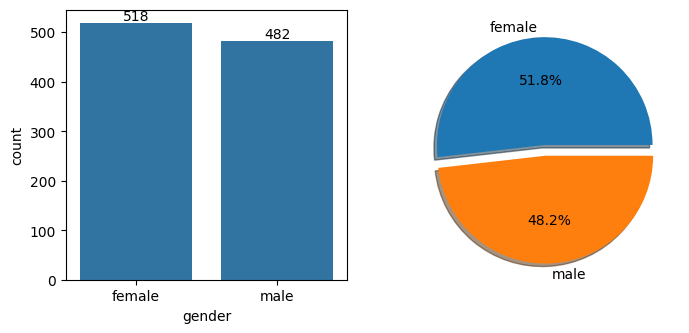

In [120]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3.5))
sb.countplot(x=df.gender, data=df, ax=ax0)
for container in ax0.containers:
    ax0.bar_label(container)
    
plt.pie(x=df.gender.value_counts(), labels=df.gender.unique(), explode=[0, .1],autopct='%.1f%%', shadow=True)
plt.show()

**Insights**
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

##### **BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

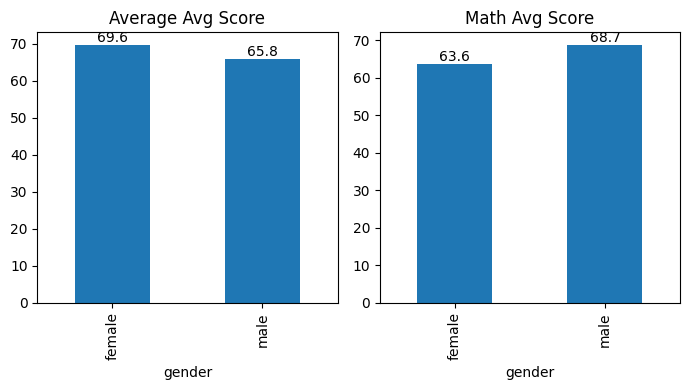

In [180]:
# Correct grouping
gender_avg_average_scores = df.groupby("gender")["average"].mean()
gender_avg_math_scores = df.groupby("gender")["math_score"].mean()

# Create subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# Plot first bar chart
gender_avg_average_scores.plot(kind="bar", ax=ax0, title="Average Avg Score")
ax0.bar_label(ax0.containers[0], fmt="%.1f")

# Plot second bar chart
gender_avg_math_scores.plot(kind="bar", ax=ax1, title="Math Avg Score")
ax1.bar_label(ax1.containers[0], fmt="%.1f")

# Adjust layout and show
plt.tight_layout()
plt.show()

**Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
How is Group wise distribution ?
Is Race/Ehnicity has any impact on student's performance ?

##### **UNIVARIATE ANALYSIS ( How is Group wise distribution ?)**

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='race_ethnicity')

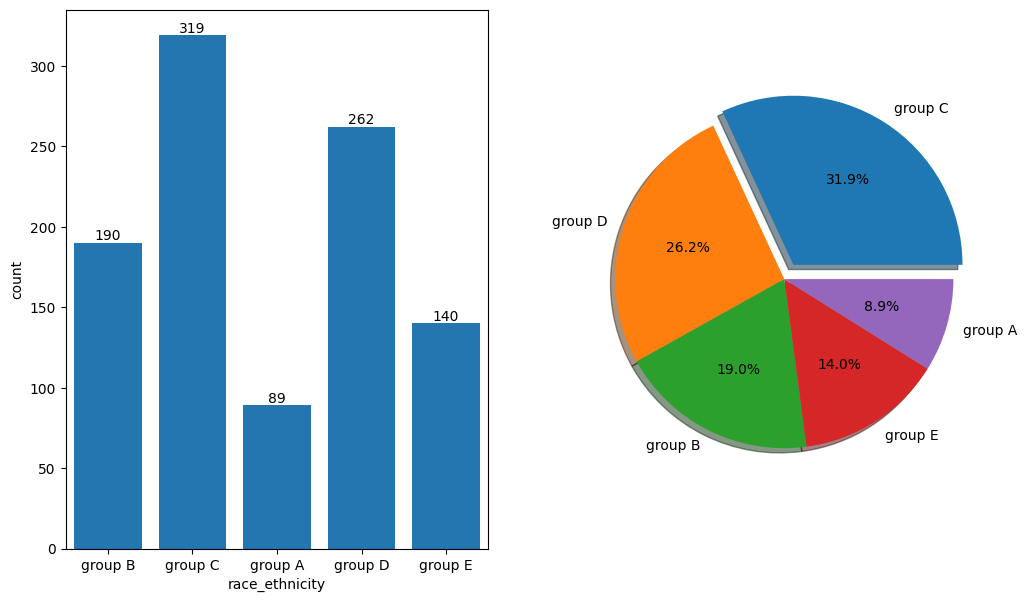

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sb.countplot(x=df.race_ethnicity, data=df, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, size=10)

labels = df.race_ethnicity.value_counts().index
plt.pie(x=df.race_ethnicity.value_counts(), labels=labels, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()   

**Insights**
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

##### **BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )**

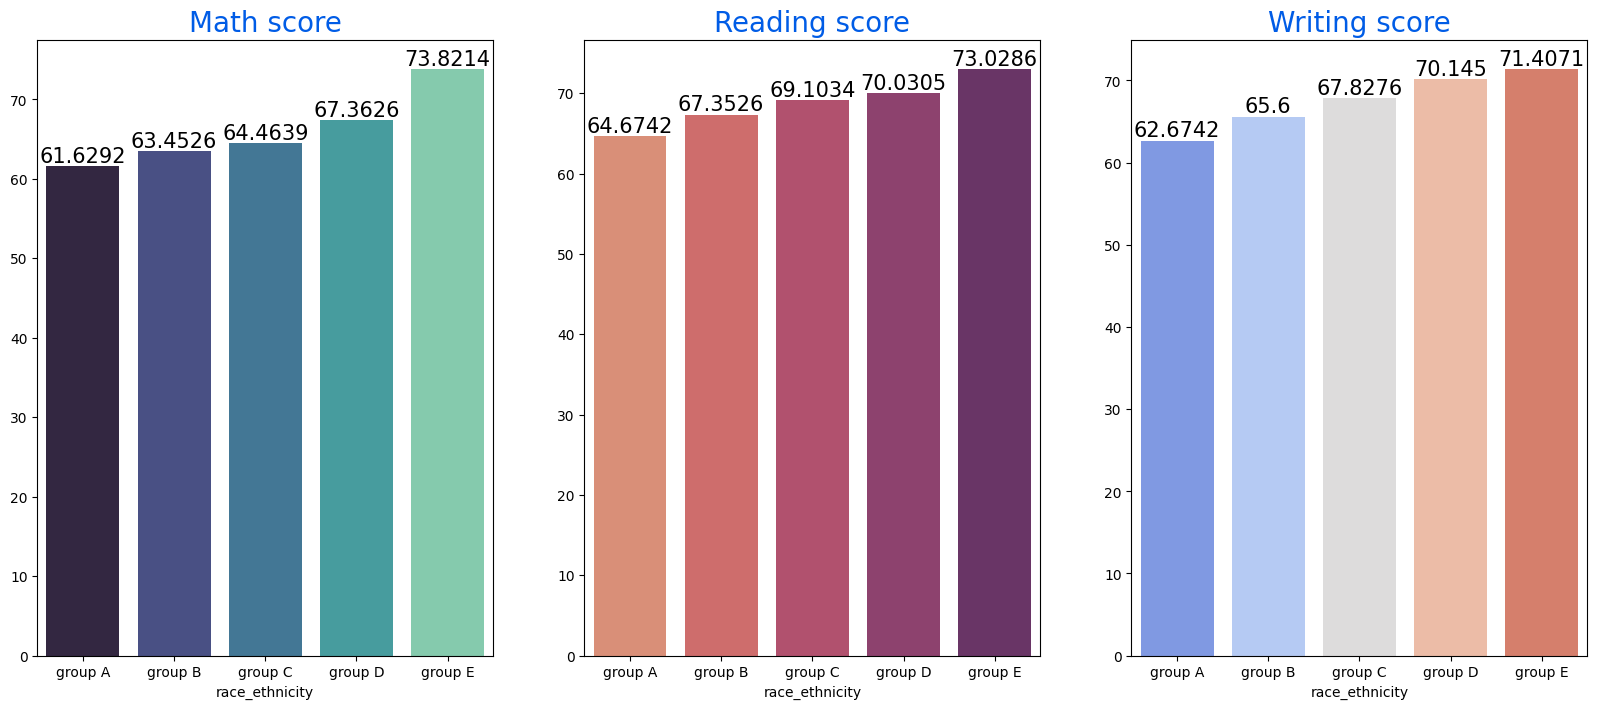

In [187]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sb.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sb.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sb.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [191]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

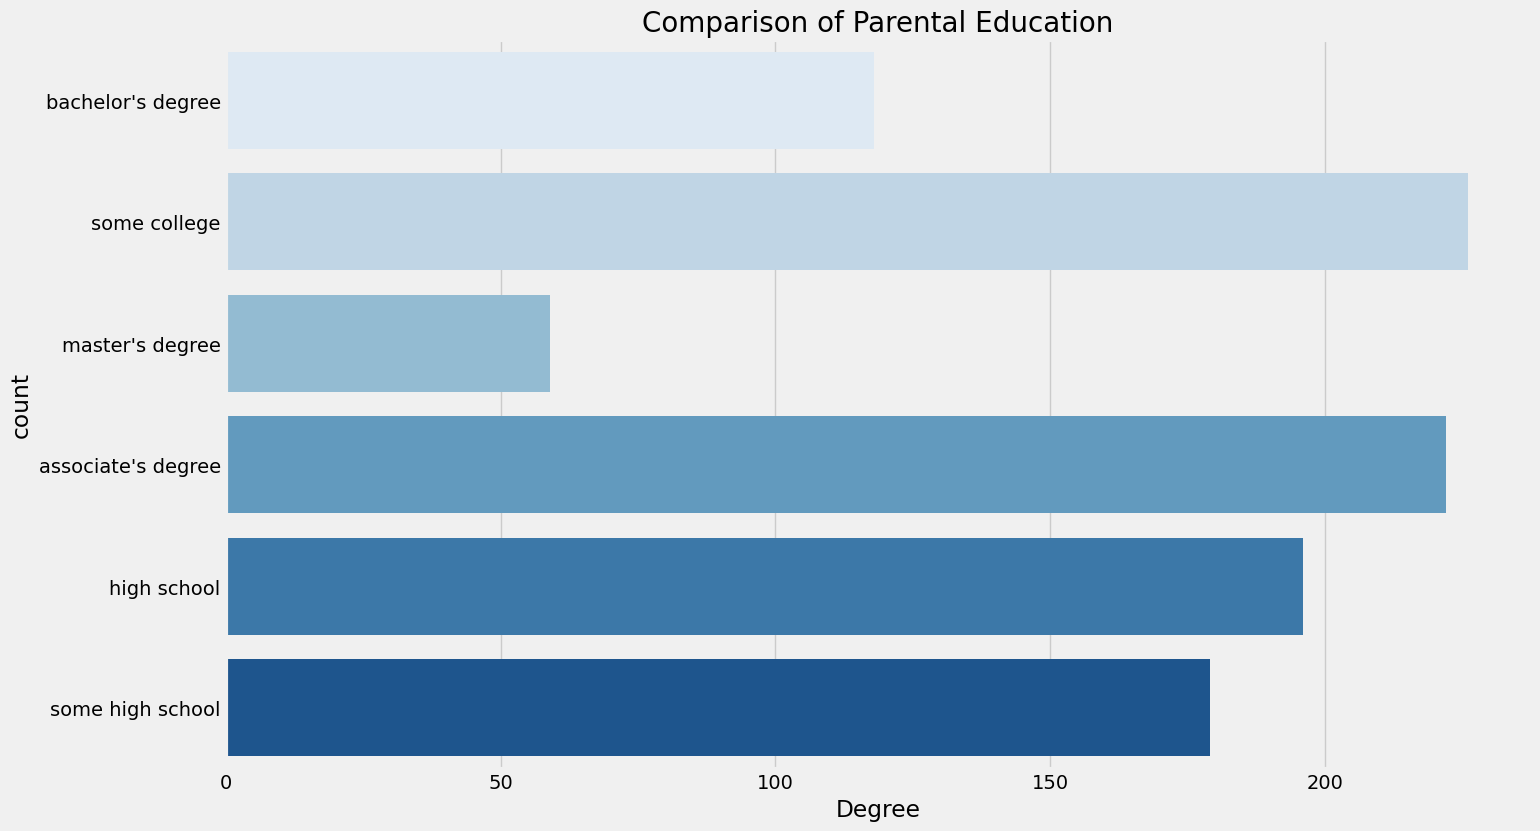

In [192]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sb.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights**
- Largest number of parents are from some college.

##### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

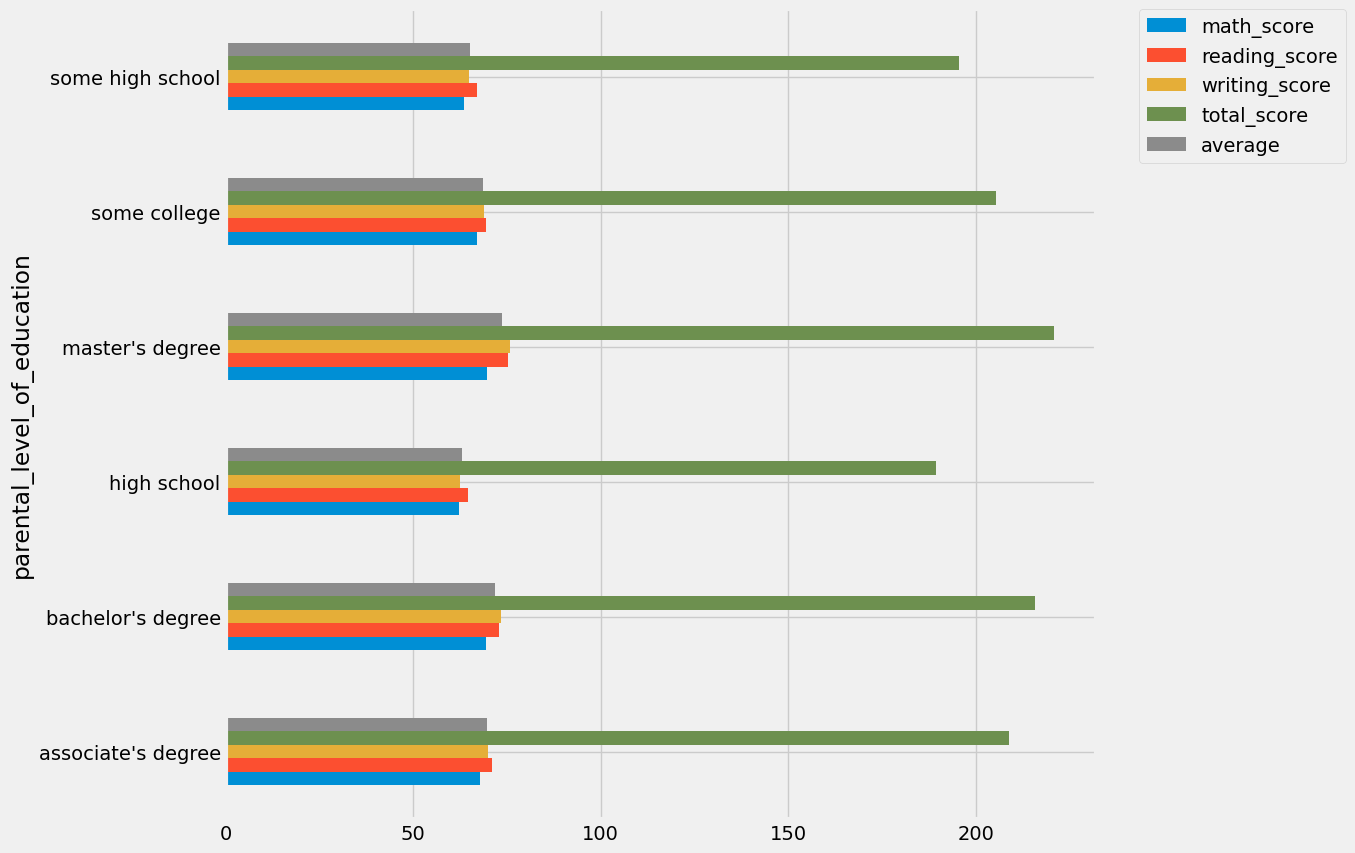

In [ ]:
# Group by 'parental_level_of_education' and take the mean of only numeric columns
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
# df.groupby('parental_level_of_education').average.mean.plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ;


**Insights**
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

<Axes: xlabel='count', ylabel='lunch'>

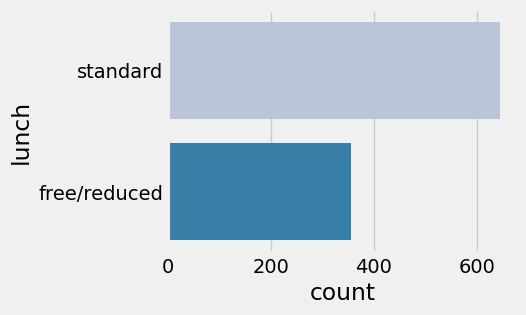

In [203]:
plt.rcParams['figure.figsize'] = (4, 3)
sb.countplot(df['lunch'], palette = 'PuBu')

**Insights**
- Students being served Standard lunch was more than free lunch

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

<Axes: ylabel='lunch'>

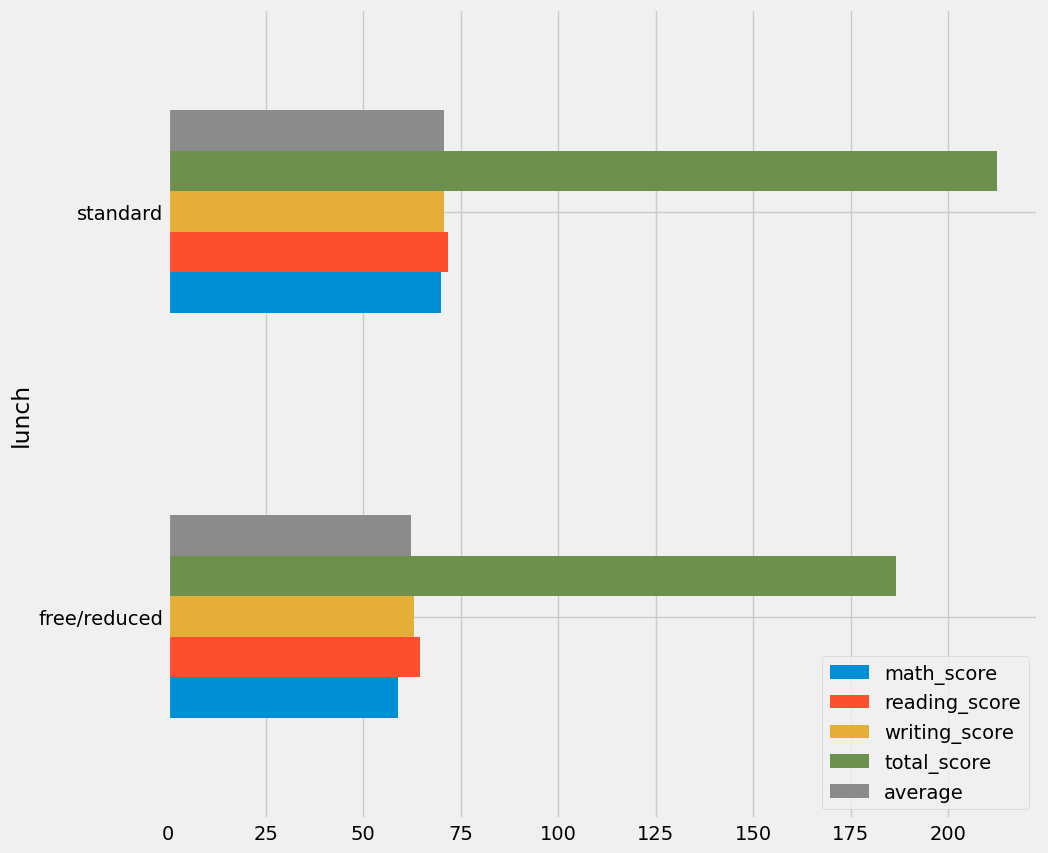

In [204]:
df.groupby('lunch').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))

In [206]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

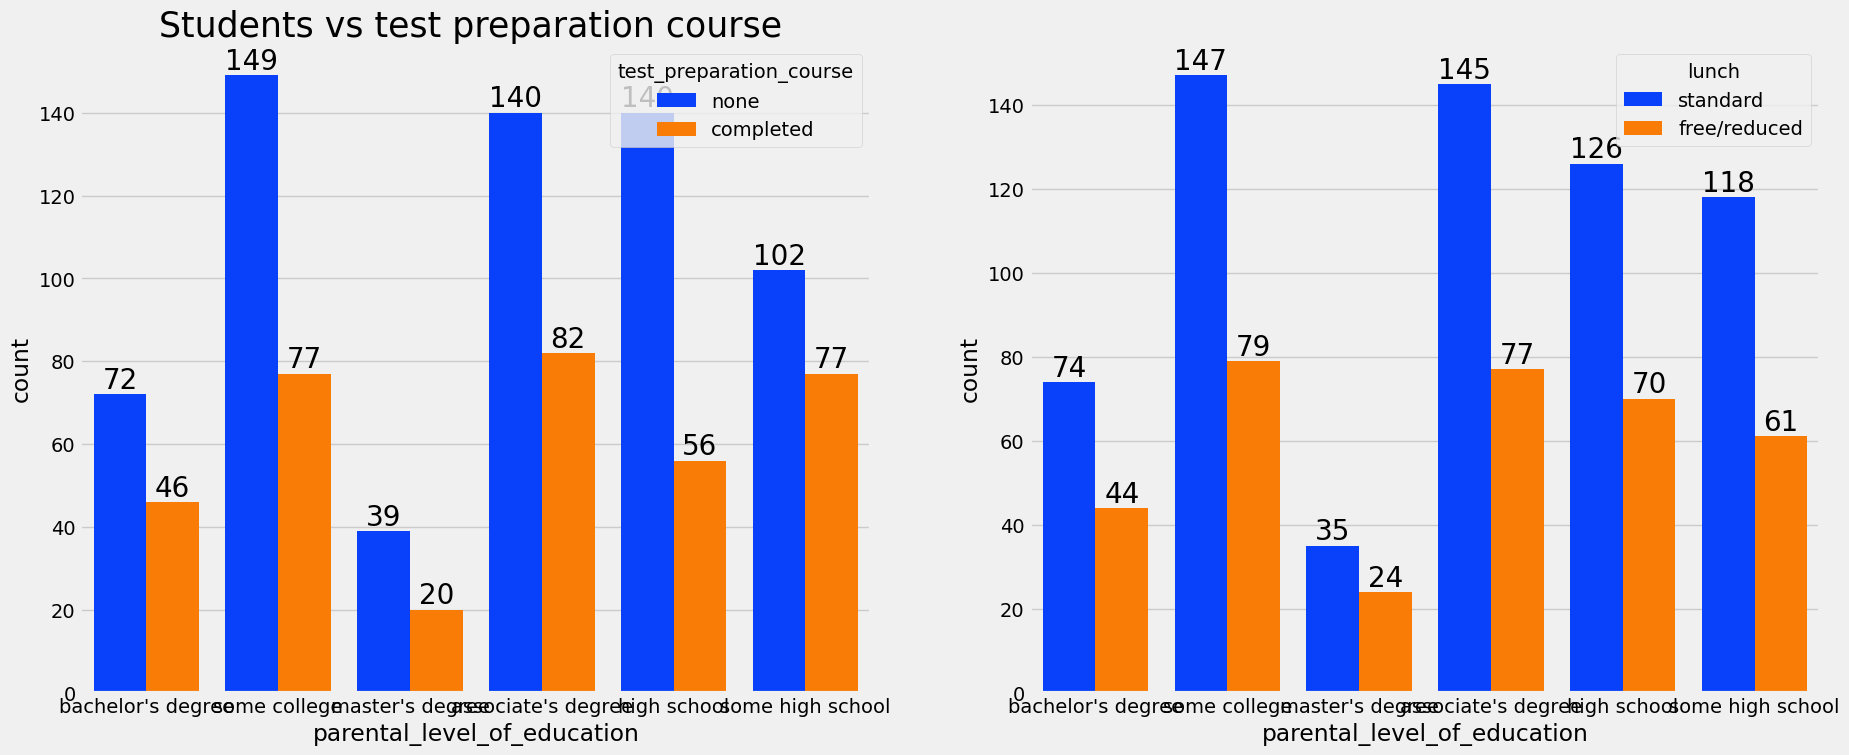

In [207]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sb.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sb.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

##### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

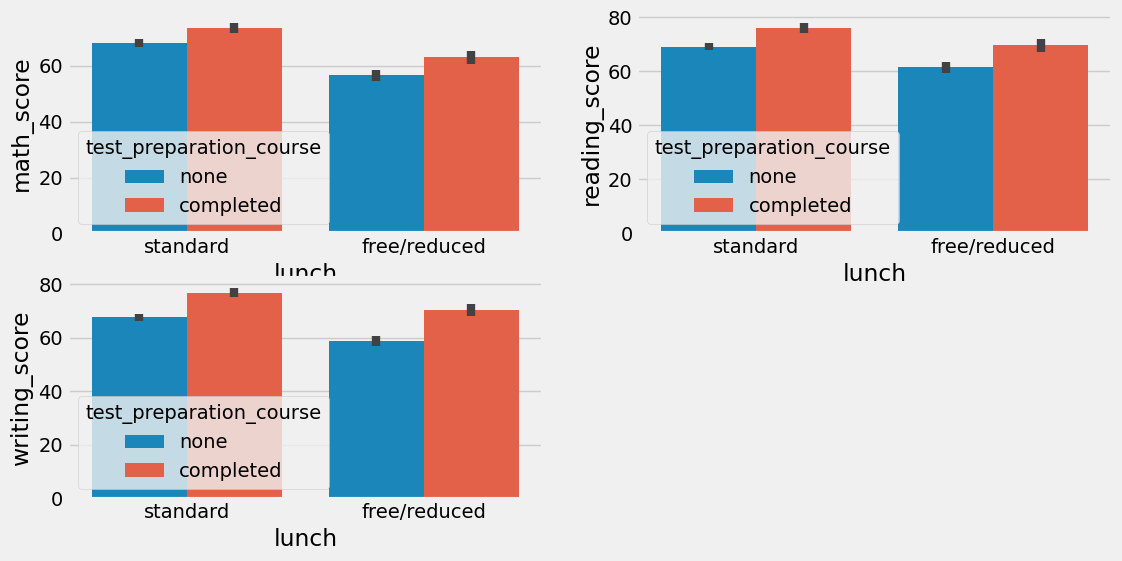

In [209]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sb.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sb.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sb.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

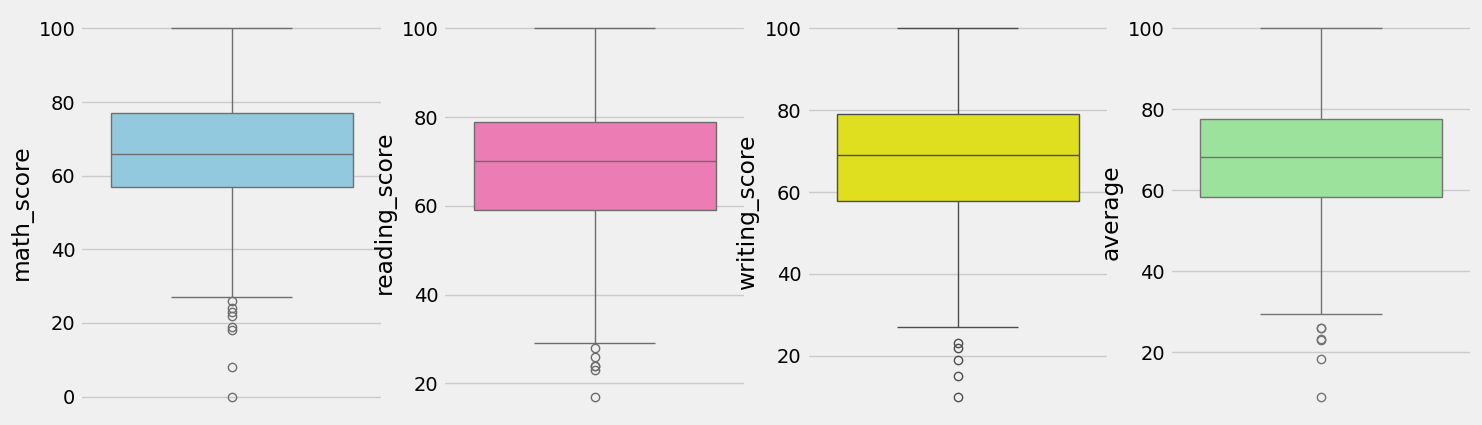

In [210]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sb.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sb.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sb.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sb.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

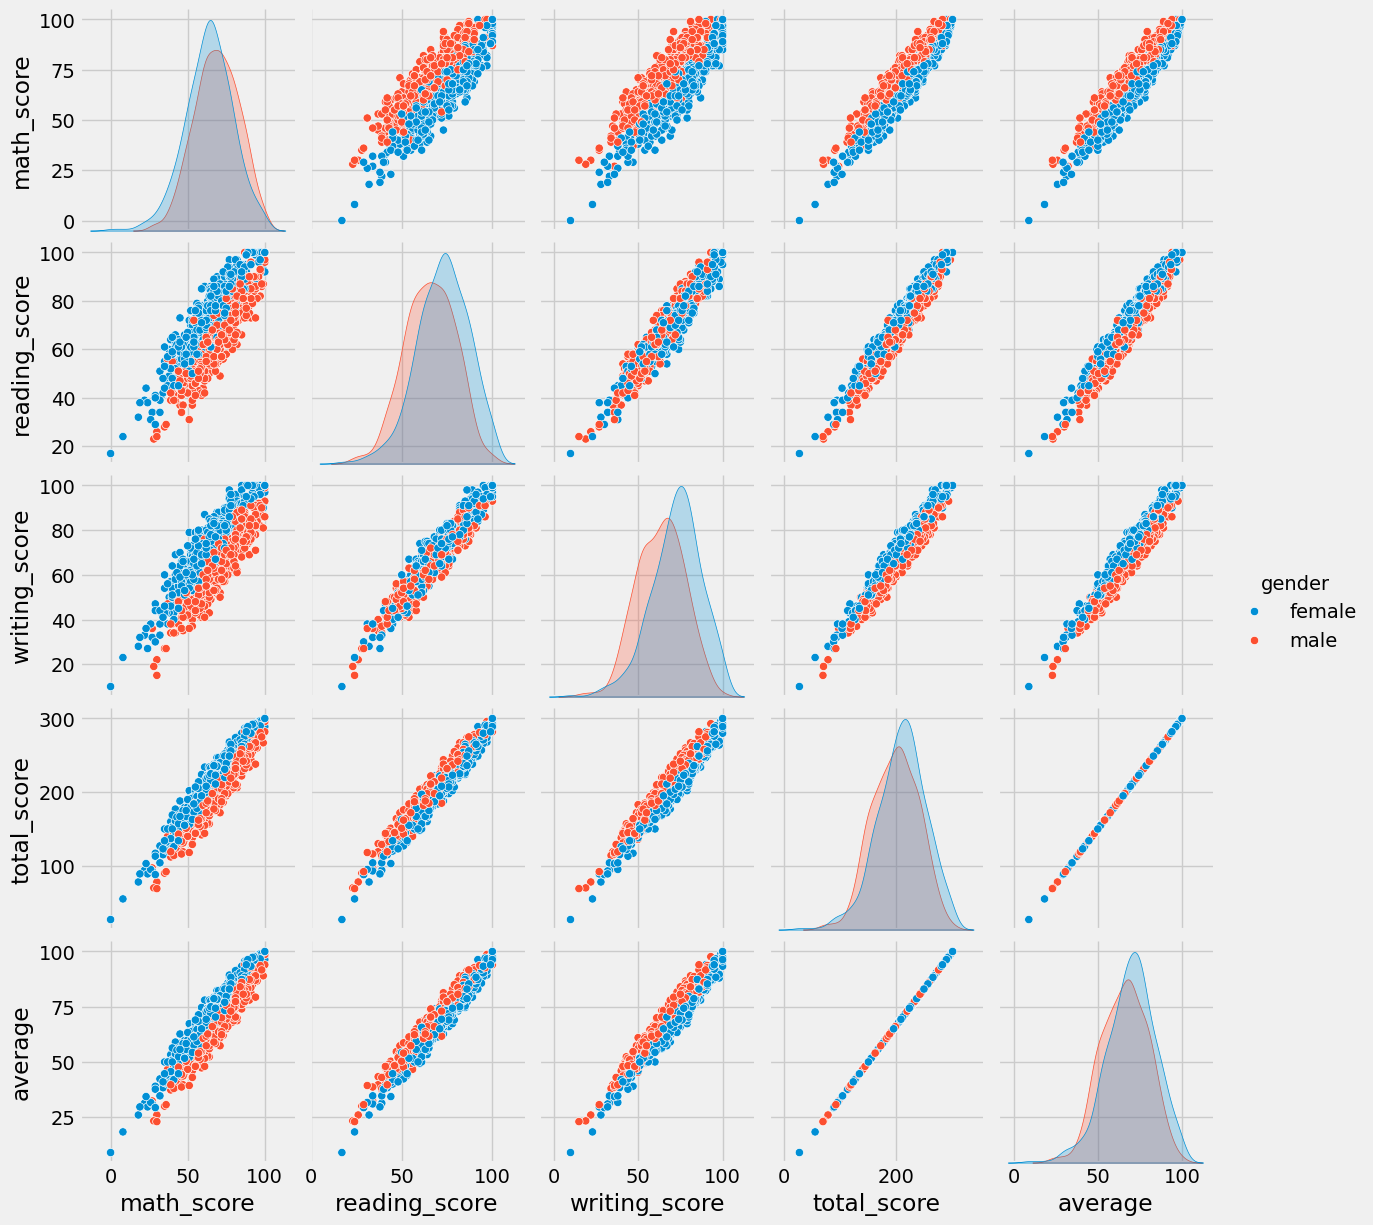

In [211]:
sb.pairplot(df,hue = 'gender')
plt.show()

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.